# Patent Inventors Ego Analysis

## Import libraries

In [1]:
# import pandas for initial processing
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# import NetworkX and nxviz for graphs
import networkx as nx
from nxviz import MatrixPlot, ArcPlot, CircosPlot

## Load/examine the data

In [3]:
# read in the raw CSV
data = pd.read_csv('co-co-inventing.csv', low_memory=False)
data.head(20)

,Firm_id,patent_id,inventor_id
0,1040,3930451,3930451-3
1,1040,3930451,3930451-2
2,1040,3930451,3930451-1
3,815,3930622,3930622-2
4,655,3930639,3930639-3
5,815,3930869,3930869-3
6,543,3930875,3930875-2
7,264,3930960,3930960-1
8,214,3930980,3930980-2
9,214,3930981,3930980-2


In [4]:
# View a default data summary of all fields in data
data.describe(include='all')

,Firm_id,patent_id,inventor_id
count,2.229540e+06,2229540,2229540
unique,NaN,593882,421729
top,NaN,7581231,4632910-2
freq,NaN,76,3461
mean,7.098477e+02,NaN,NaN
std,3.792162e+02,NaN,NaN
min,1.000000e+00,NaN,NaN
25%,3.680000e+02,NaN,NaN
50%,6.820000e+02,NaN,NaN
75%,1.039000e+03,NaN,NaN


### Inventors

In [5]:
# List top 20 inventors with most patent references
inventor_patents_count = data['inventor_id'].value_counts()[:20]
inventor_patents_count

4632910-2    3461
4039851-2    3251
4433902-3    2820
4632910-5    2738
4780571-1    2484
4831881-4    2484
4870507-2    2412
4762005-2    2279
4695906-1    2221
4632910-1    2138
4253221-2    2082
5001392-1    1945
4740881-1    1923
3979774-1    1918
4751349-1    1905
4990800-1    1905
4849977-5    1768
4702592-2    1737
4503422-1    1630
3978193-2    1582
Name: inventor_id, dtype: int64

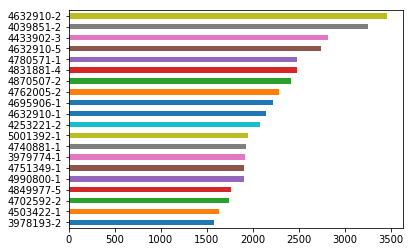

In [6]:
# Plot top 20 as bar chart sorted from most to least
inventor_patents_count.sort_values(ascending=True).plot(kind='barh')
# To save as a PNG
# plt.savefig("inventor_barh.png", dpi=300)

### Patents

In [7]:
# list top 20 patents by number of mentions
patent_counts = data['patent_id'].value_counts()[:20]
patent_counts

7581231    76
8606723    65
8694397    63
9081501    61
7512957    60
8655756    53
7555757    51
7013469    51
7017162    51
8396749    43
9296736    42
9593129    42
9202512    42
8386325    40
8566193    40
8924269    39
7224421    38
7167224    38
7965363    38
8553188    38
Name: patent_id, dtype: int64

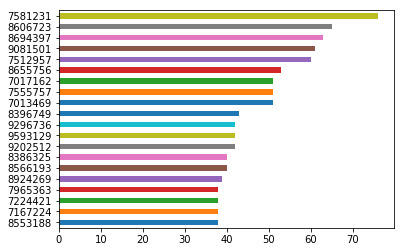

In [8]:
# Plot top 20 as bar chart sorted from most to least
patent_counts.sort_values(ascending=True).plot(kind='barh')
# To save as a PNG
# plt.savefig("patents_barh.png", dpi=300)

### Firms

In [9]:
# number of unique Firms
len(data.Firm_id.unique())

448

In [10]:
# list top firms by number mentions (either by patent/inventor/both)
firm_counts = data['Firm_id'].value_counts()[:20]
firm_counts

922     155303
1163    124490
682     118987
583     102151
573      85456
655      83415
179      73879
63       55097
1039     54009
1231     52668
240      49353
815      43292
189      33276
379      26487
1263     26399
1325     25763
275      25390
212      22407
601      20948
705      20720
Name: Firm_id, dtype: int64

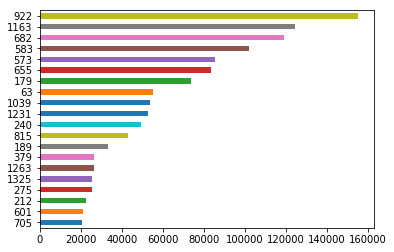

In [11]:
# Plot top 20 as bar chart sorted from most to least
firm_counts.sort_values(ascending=True).plot(kind='barh')
# To save as a PNG
# plt.savefig("firms_barh.png", dpi=300)

## Create Inventor's Patent Graph

In [12]:
# select specific inventor
data_3930451_3 = data.loc[data['inventor_id'] == '3930451-3']
data_3930451_3.head(10)

,Firm_id,patent_id,inventor_id
0,1040,3930451,3930451-3
17423,1040,4510350,3930451-3
20203,1040,4578719,3930451-3
29210,1040,4774059,3930451-3
32024,1040,4825440,3930451-3
32661,1040,4837624,3930451-3
41115,1040,4979888,3930451-3
62663,1040,5277876,3930451-3
119028,1040,5817500,3930451-3
127867,1040,5880679,3930451-3


In [13]:
# count number of patents for selected inventor
len(data_3930451_3)

87

In [14]:
# group by firm to see how many unique patents the inventor made for each
inventor_firm_groups = data_3930451_3.groupby(['Firm_id', 'inventor_id']).count()
# To view the patent numbers
# inventor_firm_groups = data_3930451_3.groupby(['Firm_id', 'inventor_id', 'patent_id']).count()
inventor_firm_groups

,,patent_id
Firm_id,inventor_id,
483,3930451-3,1
1040,3930451-3,85
1056,3930451-3,1


In [21]:
# create a graph from our inventor patent data
# ego is inventor and alters are patents
# edge data contains the Firm_id
graph_3930451_3_p = nx.from_pandas_dataframe(data_3930451_3, 'inventor_id', 'patent_id', edge_attr=['Firm_id'])

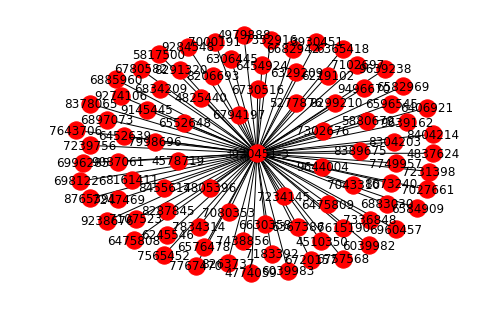

In [22]:
# draw the inventor/pantent graph
nx.draw(graph_3930451_3_p, with_labels=True)
# To save as a PNG
# plt.savefig("graph_3930451_3_patents.png", dpi=300)

## Create Inventor's Firm Graph

In [23]:
# create a graph from our inventor patent data
# ego is inventor and alters are patents
# edge data contains the Firm_id
graph_3930451_3_f = nx.from_pandas_dataframe(data_3930451_3, 'inventor_id', 'Firm_id', edge_attr=['patent_id'])

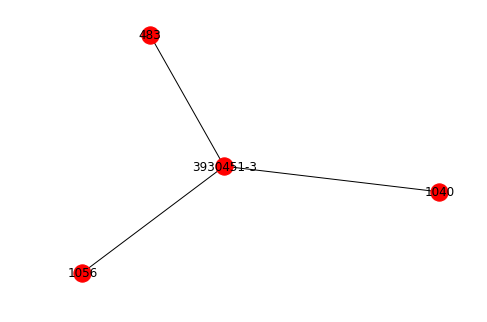

In [24]:
# draw the inventor/pantent graph
nx.draw(graph_3930451_3_f, with_labels=True)
# To save as a PNG
# plt.savefig("graph_3930451_3_patents.png", dpi=300)

## Create Inventor-to-Inventor Patent Graph

In [17]:
# create a list of inventors per patent
data_patent_inventors = data.groupby('patent_id')['inventor_id'].apply(list)

In [18]:
# to dataframe
dpi_df = data_patent_inventors.to_frame()
dpi_df['patent_id1'] = dpi_df.index
dpi_df.head()

,inventor_id,patent_id1
patent_id,,
3930451,"[3930451-3, 3930451-2, 3930451-1]",3930451
3930622,"[3930622-2, 3930622-1]",3930622
3930639,"[3930639-3, 3930639-1, 3930639-2]",3930639
3930869,"[3930869-3, 3930622-1, 3930869-5, 3930869-2, 3...",3930869
3930875,"[3930875-2, 3930875-1, 3930875-3]",3930875


possible solutions

1) multidem numpy array
2) itertools to tuples + metatdata dicts
3) pipe into graph object after deduplicate

## Create Inventor-to-Inventor Firm Graph

In [19]:
# create a list of inventors per firm
data_firm_inventors = data.groupby('Firm_id')['inventor_id'].apply(list)
data_firm_inventors.head()

Firm_id
1     [4015753-1, 4015753-1, 4015753-1, 4015753-1, 4...
4     [4464065-3, 4564761-1, 4564761-2, 4564761-2, 4...
5     [4027400-1, 4027400-1, 4071366-1, 4112949-1, 4...
14    [3937818-1, 3940394-3, 3940395-2, 3940394-1, 3...
19    [8030348-1, 8030348-1, 8030348-1, 8586567-2, 8...
Name: inventor_id, dtype: object

In [20]:
# to dataframe
dfi_df = data_firm_inventors.to_frame()
dfi_df['firm_id'] = dfi_df.index
dfi_df.head()

,inventor_id,firm_id
Firm_id,,
1,"[4015753-1, 4015753-1, 4015753-1, 4015753-1, 4...",1
4,"[4464065-3, 4564761-1, 4564761-2, 4564761-2, 4...",4
5,"[4027400-1, 4027400-1, 4071366-1, 4112949-1, 4...",5
14,"[3937818-1, 3940394-3, 3940395-2, 3940394-1, 3...",14
19,"[8030348-1, 8030348-1, 8030348-1, 8586567-2, 8...",19
